In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import warnings
from pandas.tseries.offsets import BDay
import seaborn as sb
warnings.filterwarnings("ignore")

In [25]:
companies = pd.read_csv("desired_companies.csv", index_col = 0)
companies_list = companies['fsym_id']
companies_list

0      LN3YSL-R
1      D54BL9-R
2      RYR8ZY-R
3      RK3HS8-R
4      SDDH43-R
         ...   
160    GRQMJ0-R
161    FQZF97-R
162    Q53RYJ-R
163    HRGXJJ-R
164    JCQQSM-R
Name: fsym_id, Length: 165, dtype: object

In [26]:
years = ['2018','2019','2020','2021']
prices = pd.DataFrame()
for year in years:
    year_df = pd.read_csv('Prices/' + year + '.csv', skiprows = 4, index_col = 0, parse_dates = True)
    prices = pd.concat([prices, year_df.loc[companies_list]], axis = 1)
    
prices = prices.T

In [27]:
prices.columns

Index(['LN3YSL-R', 'D54BL9-R', 'RYR8ZY-R', 'RK3HS8-R', 'SDDH43-R', 'LSK8PG-R',
       'V2LL6N-R', 'JJ8MHV-R', 'CW4JVN-R', 'JTKY01-R',
       ...
       'P6LTYW-R', 'WGLQTS-R', 'SDCW2N-R', 'KYCY91-R', 'TH0NDS-R', 'GRQMJ0-R',
       'FQZF97-R', 'Q53RYJ-R', 'HRGXJJ-R', 'JCQQSM-R'],
      dtype='object', length=165)

In [28]:
prices

,LN3YSL-R,D54BL9-R,RYR8ZY-R,RK3HS8-R,SDDH43-R,LSK8PG-R,V2LL6N-R,JJ8MHV-R,CW4JVN-R,JTKY01-R,...,P6LTYW-R,WGLQTS-R,SDCW2N-R,KYCY91-R,TH0NDS-R,GRQMJ0-R,FQZF97-R,Q53RYJ-R,HRGXJJ-R,JCQQSM-R
1/1/2018,52.42,21.99,33.50,228.57,72.62,7490.0,21.32,68.106450,4683.0,76.508354,...,53.85,146.83484,83.15,141.65,30.60,110.32,259.00,93.45,36.61,13.220
1/2/2018,53.45,22.29,35.00,226.56,74.95,7490.0,22.77,68.737670,4683.0,75.569595,...,54.30,147.16995,84.05,142.07,30.63,112.23,260.56,92.80,37.34,13.320
1/3/2018,53.47,21.88,34.70,227.50,75.51,7490.0,24.30,69.238640,4683.0,74.161470,...,54.60,145.95400,84.35,142.82,30.75,112.26,262.08,94.07,38.30,13.375
1/4/2018,52.36,21.64,34.70,225.79,71.60,7500.0,24.48,70.265620,4760.0,74.255340,...,54.80,147.92635,85.50,142.43,31.64,112.80,264.86,95.09,38.27,13.565
1/5/2018,54.50,21.34,35.45,219.88,72.92,7570.0,24.90,69.654434,4773.0,73.973720,...,55.46,148.96039,85.95,143.74,31.84,114.37,267.02,96.44,37.75,13.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/25/2021,93.37,22.29,54.52,232.50,46.62,5770.0,33.88,113.140000,4817.0,112.900000,...,95.56,212.21000,112.35,218.74,41.73,91.56,484.87,119.82,40.63,15.485
11/26/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,92.76,208.21000,108.45,215.12,40.06,89.44,475.37,115.22,38.67,14.950
11/27/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,92.76,208.21000,108.45,215.12,40.06,89.44,475.37,115.22,38.67,14.950
11/28/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,92.76,208.21000,108.45,215.12,40.06,89.44,475.37,115.22,38.67,14.950


In [110]:
#removes non-business days
def filter_bdays(df):
    isBusinessDay = BDay().onOffset
    match_series = pd.to_datetime(df.index).map(isBusinessDay)
    return df[match_series]

In [51]:
def run_strat(data, lookback, enter, exit):

###Parameters###
# lookback = 20
# width = 2
# enter = 0.9
# exit = 0.7
# df = prices.copy()
    df = data.copy()

    for name in df.columns:
        df[name + ' SMA'] = np.log(df[name]).rolling(lookback).mean()
    #     df[name + ' UB'] = df[name + ' SMA'] + (np.log(df[name]).rolling(lookback).std() * width) #upper band
    #     df[name + ' LB'] = df[name + ' SMA'] - (np.log(df[name]).rolling(lookback).std() * width) #lower band
       # df[df[name] > df[name + 'UB']].astype(int) * -1 + df[df[name] < df[name + 'LB']].astype(int) 
        df[name + ' Z-Score'] = (np.log(df[name]) - df[name + ' SMA'])/np.log(df[name]).rolling(lookback).std()


        #calculating Short and Long Positions based on the location of Z-Score indicator and the enter-width band. 
        #We unwind our positions when the indicator reaches the exit band

        df[name + ' Sell Position'] = np.where(df[name + ' Z-Score'] > enter, -1, 
                      np.where(df[name + ' Z-Score'] < exit, 0, np.nan))
        df[name + ' Sell Position'] = df[name + ' Sell Position'].ffill().fillna(0)

        df[name + ' Buy Position'] = np.where(df[name + ' Z-Score'] < -1 * enter, 1, 
                          np.where(df[name + ' Z-Score'] > -1 * exit, 0, np.nan))
        df[name + ' Buy Position'] = df[name + ' Buy Position'].ffill().fillna(0)
        df[name + '|Position'] = df[name + ' Buy Position'] + df[name + ' Sell Position']
        df[name + ' Weighted Position'] = df[name + '|Position'] * np.abs(df[name + ' Z-Score'])
        df[name + '|P&L'] = df[name + ' Weighted Position'] * (1 + (df[name].diff().shift(-1)/df[name]))
    df['Total P&L'] = df.filter(regex = '\|P&L').sum(axis = 1)
    df['Cumulative P&L'] = df['Total P&L'].cumsum()
        
    return df

In [52]:
test1 = run_strat(prices, 20, 0.9, 0.7)
test1

,LN3YSL-R,D54BL9-R,RYR8ZY-R,RK3HS8-R,SDDH43-R,LSK8PG-R,V2LL6N-R,JJ8MHV-R,CW4JVN-R,JTKY01-R,...,HRGXJJ-R|P&L,JCQQSM-R SMA,JCQQSM-R Z-Score,JCQQSM-R Sell Position,JCQQSM-R Buy Position,JCQQSM-R|Position,JCQQSM-R Weighted Position,JCQQSM-R|P&L,Total P&L,Cumulative P&L
1/1/2018,52.42,21.99,33.50,228.57,72.62,7490.0,21.32,68.106450,4683.0,76.508354,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/2/2018,53.45,22.29,35.00,226.56,74.95,7490.0,22.77,68.737670,4683.0,75.569595,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/3/2018,53.47,21.88,34.70,227.50,75.51,7490.0,24.30,69.238640,4683.0,74.161470,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/4/2018,52.36,21.64,34.70,225.79,71.60,7500.0,24.48,70.265620,4760.0,74.255340,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/5/2018,54.50,21.34,35.45,219.88,72.92,7570.0,24.90,69.654434,4773.0,73.973720,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/25/2021,93.37,22.29,54.52,232.50,46.62,5770.0,33.88,113.140000,4817.0,112.900000,...,0.000000,2.704816,1.650536,-1.0,0.0,-1.0,-1.650536,-1.593511,3.190970,-22275.918893
11/26/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,2.542094,2.706482,-0.089728,0.0,0.0,0.0,0.000000,0.000000,195.646103,-22080.272790
11/27/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,2.114444,2.708148,-0.191589,0.0,0.0,0.0,0.000000,0.000000,173.866003,-21906.406787
11/28/2021,91.51,20.90,52.15,229.32,45.90,5760.0,32.71,107.690000,4783.0,108.900000,...,1.926276,2.710022,-0.349753,0.0,0.0,0.0,0.000000,0.000000,157.966522,-21748.440265


In [155]:
~

dict_values([DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq=None), DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq=None), DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
            

In [111]:
prices_2020 = pd.read_csv('Prices/' + '2020' + '.csv', skiprows = 4, index_col = 0, parse_dates = True)
prices_2020 = prices_2020.loc[companies_list].T
prices_2020 = filter_bdays(prices_2020)
prices_2020

ticker,LN3YSL-R,D54BL9-R,RYR8ZY-R,RK3HS8-R,SDDH43-R,LSK8PG-R,V2LL6N-R,JJ8MHV-R,CW4JVN-R,JTKY01-R,...,P6LTYW-R,WGLQTS-R,SDCW2N-R,KYCY91-R,TH0NDS-R,GRQMJ0-R,FQZF97-R,Q53RYJ-R,HRGXJJ-R,JCQQSM-R
1/1/2020,76.76,17.30,21.68,189.75,58.96,6190.0,22.27,64.524536,4003.0,72.526920,...,81.56,177.00,91.80,197.87,27.86,94.48,354.23,120.32,30.52,12.965
1/2/2020,75.98,16.33,21.67,188.30,59.08,6190.0,22.35,65.316070,4003.0,73.685030,...,84.00,180.79,93.15,203.31,28.54,93.86,365.17,122.00,31.01,12.925
1/3/2020,75.15,16.08,21.64,189.53,59.08,6190.0,22.18,64.950356,4003.0,73.298990,...,82.54,178.86,91.55,210.47,28.36,91.55,363.03,120.46,30.01,12.755
1/6/2020,74.76,16.56,21.63,190.40,59.59,6140.0,22.12,63.492546,3880.0,73.298990,...,82.54,177.51,91.55,211.72,28.23,91.31,359.61,119.56,30.01,12.755
1/7/2020,74.97,16.84,21.66,183.60,59.29,6270.0,22.65,63.803146,3969.0,73.829796,...,83.52,177.61,91.50,212.73,28.48,90.92,361.44,120.10,30.09,12.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/25/2020,90.06,18.60,31.00,215.81,39.62,4780.0,20.02,82.690000,3660.0,62.055634,...,98.04,209.53,88.60,185.16,34.78,90.61,420.12,103.76,26.46,15.295
12/28/2020,90.56,18.77,30.47,218.64,39.66,4835.0,20.15,82.830000,3663.0,60.704500,...,98.36,209.94,88.90,187.32,35.77,90.60,423.15,105.26,26.20,15.680
12/29/2020,89.80,18.83,30.19,217.44,39.41,4875.0,19.88,81.050000,3710.0,62.731197,...,98.62,209.13,91.30,186.29,35.46,89.49,419.60,106.80,26.19,15.745
12/30/2020,90.50,18.65,31.07,218.21,39.34,4805.0,20.28,81.550000,3659.0,61.766100,...,97.64,210.95,88.00,187.65,35.16,91.07,421.82,107.22,26.18,15.645


In [115]:
test2 = run_strat(prices_2020, 5,0.7,0.5)
test2

ticker,LN3YSL-R,D54BL9-R,RYR8ZY-R,RK3HS8-R,SDDH43-R,LSK8PG-R,V2LL6N-R,JJ8MHV-R,CW4JVN-R,JTKY01-R,...,HRGXJJ-R|P&L,JCQQSM-R SMA,JCQQSM-R Z-Score,JCQQSM-R Sell Position,JCQQSM-R Buy Position,JCQQSM-R|Position,JCQQSM-R Weighted Position,JCQQSM-R|P&L,Total P&L,Cumulative P&L
1/1/2020,76.76,17.30,21.68,189.75,58.96,6190.0,22.27,64.524536,4003.0,72.526920,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/2/2020,75.98,16.33,21.67,188.30,59.08,6190.0,22.35,65.316070,4003.0,73.685030,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/3/2020,75.15,16.08,21.64,189.53,59.08,6190.0,22.18,64.950356,4003.0,73.298990,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/6/2020,74.76,16.56,21.63,190.40,59.59,6140.0,22.12,63.492546,3880.0,73.298990,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1/7/2020,74.97,16.84,21.66,183.60,59.29,6270.0,22.65,63.803146,3969.0,73.829796,...,0.000000,2.550973,-1.026845,0.0,1.0,1.0,1.026845,0.996929,9.532795,9.532795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/25/2020,90.06,18.60,31.00,215.81,39.62,4780.0,20.02,82.690000,3660.0,62.055634,...,0.000000,2.723780,0.681147,0.0,0.0,0.0,0.000000,0.000000,-40.707080,inf
12/28/2020,90.56,18.77,30.47,218.64,39.66,4835.0,20.15,82.830000,3663.0,60.704500,...,1.426938,2.731186,1.739589,-1.0,0.0,-1.0,-1.739589,-1.746800,-79.904180,inf
12/29/2020,89.80,18.83,30.19,217.44,39.41,4875.0,19.88,81.050000,3710.0,62.731197,...,1.129297,2.738297,1.229652,-1.0,0.0,-1.0,-1.229652,-1.221843,-30.488198,inf
12/30/2020,90.50,18.65,31.07,218.21,39.34,4805.0,20.28,81.550000,3659.0,61.766100,...,0.797348,2.742822,0.517962,-1.0,0.0,-1.0,-0.517962,-0.517962,-65.769384,inf


In [121]:
test2['Cumulative P&L'][np.isinf(test2['Cumulative P&L'])]
test2.loc['1/15/2020'][np.isinf(test2.loc['1/15/2020'])]
test2.loc['1/7/2020':'1/15/2020','V61MC3-R']

1/7/2020     1243.0
1/8/2020     1220.0
1/9/2020     1230.0
1/10/2020    1230.0
1/13/2020    1230.0
1/14/2020    1230.0
1/15/2020    1230.0
Name: V61MC3-R, dtype: float64

In [113]:
#gets sharpe ratio function
def get_sharpe(r, rfr=0.02):
    if r.std():
        return (r.mean()-rfr) / r.std() * np.sqrt(252)
    return 0
get_sharpe(test2['Total P&L'].fillna(0))

nan

ticker,LN3YSL-R,D54BL9-R,RYR8ZY-R,RK3HS8-R,SDDH43-R,LSK8PG-R,V2LL6N-R,JJ8MHV-R,CW4JVN-R,JTKY01-R,...,HRGXJJ-R|P&L,JCQQSM-R SMA,JCQQSM-R Z-Score,JCQQSM-R Sell Position,JCQQSM-R Buy Position,JCQQSM-R|Position,JCQQSM-R Weighted Position,JCQQSM-R|P&L,Total P&L,Cumulative P&L
1/1/2020,76.76,17.30,21.68,189.75,58.96,6190.0,22.27,64.524536,4003.0,72.526920,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0
1/2/2020,75.98,16.33,21.67,188.30,59.08,6190.0,22.35,65.316070,4003.0,73.685030,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0
1/3/2020,75.15,16.08,21.64,189.53,59.08,6190.0,22.18,64.950356,4003.0,73.298990,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0
1/4/2020,75.15,16.08,21.64,189.53,59.08,6190.0,22.18,64.950356,4003.0,73.298990,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0
1/5/2020,75.15,16.08,21.64,189.53,59.08,6190.0,22.18,64.950356,4003.0,73.298990,...,0.000000,2.551837,-0.723741,0.0,1.0,1.0,0.723741,0.723741,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2020,90.06,18.60,31.00,215.81,39.62,4780.0,20.02,82.690000,3660.0,62.055634,...,NaN,2.727526,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
12/28/2020,90.56,18.77,30.47,218.64,39.66,4835.0,20.15,82.830000,3663.0,60.704500,...,1.788172,2.732498,1.788854,-1.0,0.0,-1.0,-1.788854,-1.796270,inf,NaN
12/29/2020,89.80,18.83,30.19,217.44,39.41,4875.0,19.88,81.050000,3710.0,62.731197,...,1.129297,2.738297,1.229652,-1.0,0.0,-1.0,-1.229652,-1.221843,-24.470179,NaN
12/30/2020,90.50,18.65,31.07,218.21,39.34,4805.0,20.28,81.550000,3659.0,61.766100,...,0.797348,2.742822,0.517962,-1.0,0.0,-1.0,-0.517962,-0.517962,-61.157042,NaN


In [134]:
#testing possible look parameters
lookback_params = np.array([10,15,20,25])
#possible enter widths
enter_widths = np.arange(1.5,3.0,0.1)
train = []
for l in lookback_params:
    for ent in enter_widths:
        #testing all exit widths from 0.5 to the enter width
        exit_widths = np.arange(0.5, ent, 0.1)
        for ext in exit_widths:
            #run strategy with these parameters
            df = run_strat(prices_2020, l, ent, ext)
            
#             #dataframe consisting just of positions
#             positions = df.filter(regex = '\|Position')
            
#             #long positions
#             long_pos = positions.apply(lambda x: x[x == 1], axis = 1)
#             #short positions
#             short_pos = positions.apply(lambda x: x[x == -1], axis = 1)
            
#             #weights for each position
#             weight_positions = df.filter(regex = 'Weight')
            
            sharpe = get_sharpe(df['Total P&L'])
            train.append({'Lookback': l,
                          'Enter': ent,
                          'Exit': ext,
                          'Sharpe': sharpe})
train
            
            
            

[{'Lookback': 10, 'Enter': 1.5, 'Exit': 0.5, 'Sharpe': -1.7058213857175941},
 {'Lookback': 10, 'Enter': 1.5, 'Exit': 0.6, 'Sharpe': -1.581801612164898},
 {'Lookback': 10, 'Enter': 1.5, 'Exit': 0.7, 'Sharpe': -1.5341210461801629},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 0.7999999999999999,
  'Sharpe': -1.3856415032766287},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 0.8999999999999999,
  'Sharpe': -1.2595174217537277},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 0.9999999999999999,
  'Sharpe': -1.0647653575380411},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 1.0999999999999999,
  'Sharpe': -0.8949949755133927},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 1.1999999999999997,
  'Sharpe': -0.7340345286432818},
 {'Lookback': 10,
  'Enter': 1.5,
  'Exit': 1.2999999999999998,
  'Sharpe': -0.5518971216255854},
 {'Lookback': 10, 'Enter': 1.5, 'Exit': 1.4, 'Sharpe': -0.4848454439671036},
 {'Lookback': 10, 'Enter': 1.6, 'Exit': 0.5, 'Sharpe': -1.4765837383783111},
 {'Lookback': 10, 'Enter': 1

Lookback: 10


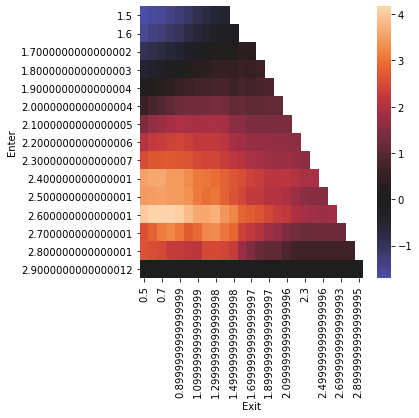

Lookback: 15


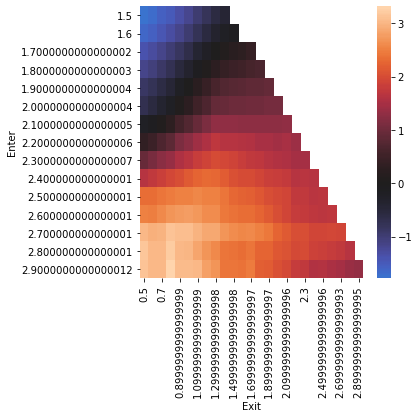

Lookback: 20


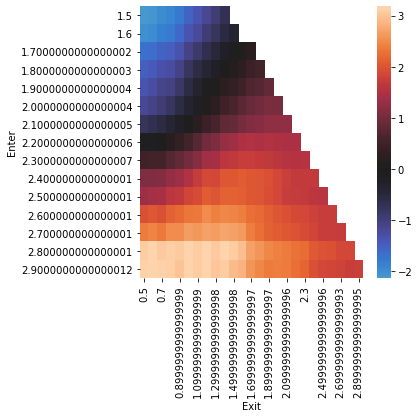

Lookback: 25


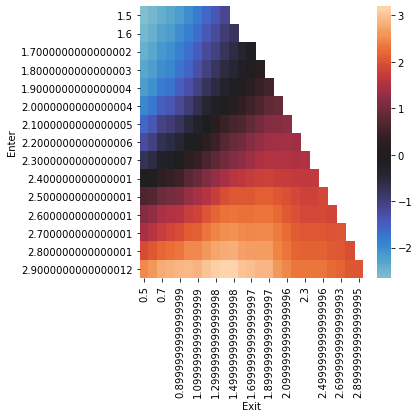

In [135]:
for l in lookback_params:
    #training for specific lookback
    lb_train = list(filter(lambda x: x['Lookback'] == l, train))
    lb_df = pd.DataFrame(lb_train)
    lb_df = lb_df.pivot(index = 'Enter', columns = 'Exit', values = 'Sharpe')
    print("Lookback: " + str(l))
    fig, ax = plt.subplots(figsize=(5,5))  
    h1 = sb.heatmap(lb_df, center = 0, ax = ax)
    plt.show()

In [ ]:
# Parameters to test (LB, Enter, Exit):
#     (10,2.6,0.6)
#     (15,2.9,0.8)
#     (20,2.8,1.1)
#     (25,2.9,1.3)


In [25]:
positions

Ticker,LN3YSL-R|Position,D54BL9-R|Position,RYR8ZY-R|Position,RK3HS8-R|Position,SDDH43-R|Position,LSK8PG-R|Position,V2LL6N-R|Position,JJ8MHV-R|Position,CW4JVN-R|Position,JTKY01-R|Position,...,P6LTYW-R|Position,WGLQTS-R|Position,SDCW2N-R|Position,KYCY91-R|Position,TH0NDS-R|Position,GRQMJ0-R|Position,FQZF97-R|Position,Q53RYJ-R|Position,HRGXJJ-R|Position,JCQQSM-R|Position
01/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/02/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/03/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/04/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/05/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08/19/2021,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
08/20/2021,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0
08/21/2021,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0
08/22/2021,1.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0


In [26]:
long_pos = positions.apply(lambda x: x[x == 1], axis = 1)
short_pos = positions.apply(lambda x: x[x == -1], axis = 1)

In [27]:
weight_positions = df.filter(regex = 'Weight')

In [28]:
weight_positions

Ticker,LN3YSL-R Weighted Position,D54BL9-R Weighted Position,RYR8ZY-R Weighted Position,RK3HS8-R Weighted Position,SDDH43-R Weighted Position,LSK8PG-R Weighted Position,V2LL6N-R Weighted Position,JJ8MHV-R Weighted Position,CW4JVN-R Weighted Position,JTKY01-R Weighted Position,...,P6LTYW-R Weighted Position,WGLQTS-R Weighted Position,SDCW2N-R Weighted Position,KYCY91-R Weighted Position,TH0NDS-R Weighted Position,GRQMJ0-R Weighted Position,FQZF97-R Weighted Position,Q53RYJ-R Weighted Position,HRGXJJ-R Weighted Position,JCQQSM-R Weighted Position
01/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/02/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/04/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08/19/2021,-2.389734,-1.937956,-1.654511,-0.863544,-0.0,-1.270366,-0.0,0.0,-0.000000,-1.072775,...,-1.577888,-1.764056,-3.072779,-0.0,-0.0,-1.285838,-1.612000,0.000000,-3.076965,-2.626908
08/20/2021,-1.333825,-1.095467,-1.739990,-0.804605,0.0,-1.911451,-0.0,0.0,0.000000,-0.000000,...,-0.000000,-1.584643,-2.468256,0.0,-0.0,-0.928694,-0.934077,-0.905580,-2.742261,-2.131948
08/21/2021,-1.198519,-0.990745,-1.537885,-0.745625,0.0,-1.667256,-0.0,0.0,0.000000,-0.000000,...,-0.000000,-1.433052,-2.083244,0.0,-0.0,-0.896988,-0.848651,-0.863928,-2.224987,-1.833711
08/22/2021,-1.095398,-0.897801,-1.409670,-0.000000,0.0,-1.473295,-0.0,0.0,0.000000,-0.000000,...,-0.000000,-1.284046,-1.791856,-0.0,-0.0,-0.877362,-0.765613,-0.840992,-1.891938,-1.642717
